# Sentsitivity Analysis in Python

This guide is organized in the following sections

- Sensitivity Analysis Theory
- The Hard Way
- The Easy Way (use sensitivity package)

## What is Sensitivity Analysis?

Sensitivity analysis is the process of passing different inputs to a model to see how the outputs change. it differs from Monte Carlo Simulation in that no probability distributions are assigned to the inputs, and typically larger ranges of the inputs are chosen. the purpose of Sensitivity Analysis is to understand how the outputs change over the full range of possible inputs. Sentitivity Analysis does not derive any expected outcome or a probability distribution of outcomes, instead returning a range of possible output variables associated with each set of inputs.

The general purpose for Sensitivity Analysis is as follows:

For the model given by: 
$$y = f(x)$$
$$X = [x_1,x_2,...x_n]$$

Where:

- $y$: Model output
- $X$: Model input matrix
- $x_i$: Value of $ith$ $x$ variable

Following the following steps:

- Choose a set of values for each $xi$
- Take the cartesian product of these values as $[X_1, X_2, ..., X_n]$
- For each $Xi$ calculate $yi = f(Xi)$
- Store the values of $Xi$ mapped to $yi$
- Visualise $yi$ versus $Xi$

## How to do Sensitivity Analysis in Python?

Abstract algorithms are great, but lets see the code that can make this happen. First we'll import pandas to use later and define a function which represents the model:

In [1]:
import pandas as pd


def my_model(x_1: int, x_2: int) -> float:
    '''
    Represents f from above
    '''

    return x_1 ** x_2

In [2]:
y = my_model(2, 4)
y

16

Now lets go step by step through the above algorithm. First let's choose a set of values for each $X_i$:

In [3]:
x1_values = [10, 20, 30]
x2_values = [1, 2, 3]

While we can uuse ```itertools.product``` to take care of a cartesian product of an arbitrary number of inputs, a more straightforward approach is to use nested loops. A for loop within a for loop will run with each combination of the inputs

In [4]:
for x1 in x1_values:
    for x2 in x2_values:
        print(x1, x2)

10 1
10 2
10 3
20 1
20 2
20 3
30 1
30 2
30 3


Now we have each $X_i$, we need to calculate $y_i = f(X_i)$:

In [5]:
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        print(y_i)

10
100
1000
20
400
8000
30
900
27000


Now store the values of $X_i$ mapped to $y_i$:

In [6]:
outputs = []

for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        outputs.append((x1, x2, y_i))

outputs

[(10, 1, 10),
 (10, 2, 100),
 (10, 3, 1000),
 (20, 1, 20),
 (20, 2, 400),
 (20, 3, 8000),
 (30, 1, 30),
 (30, 2, 900),
 (30, 3, 27000)]

Now the last step is ot visualise the result.We can do this with a table format through a ```DataFrame```

In [12]:
df = pd.DataFrame(outputs, columns=["x_1", "x_2", "y"])
df

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can add styling to teh DataFrame to highlight the high and low values:

In [13]:
df.style.background_gradient(subset='y', cmap='RdYlGn')

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can also plot the reuslts with a hex-bin plot:

<AxesSubplot:xlabel='x_1', ylabel='x_2'>

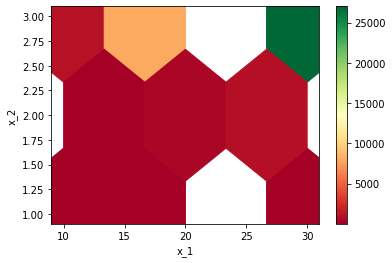

In [14]:
df.plot.hexbin(x="x_1", y="x_2", C="y", gridsize=3, cmap='RdYlGn', sharex=False)

## Using the Sensitivity Library

The sensitivity package is designed around making this whole process easier. It is also able to handle more than two varying inputs with ease. the basic usage is to construct a dictonary where the keys are the names of the inputts in a functionand values are iterables of the values for that input. then this dictionary is passed to ```SensitivityAnalyzer``` along with the function. The rest is handled for you.

In [15]:
from sensitivity import SensitivityAnalyzer


sensitivity_dict = {
    "x_1": [10, 20, 30],
    "x_2": [1, 2, 3]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model)

100%|██████████| 9/9 [00:00<00:00, 851.62it/s]


Now that we have created the ```SensitivityAnalyzer``` object, it has finished the sensitivity analysis. we canview a ```DataFrame``` with theresults at ```.df```:

In [16]:
sa.df

,x_1,x_2,Result
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can also get the hex-bin plot and styled DataFrame:

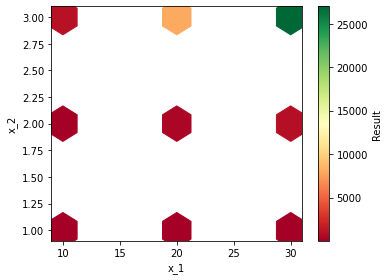

In [17]:
plot = sa.plot()

In [18]:
styled = sa.styled_dfs()

,1,2,3
x_1,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


When creating the ```SentitivityAnalyser``` object, you can pass other options for formating the outputs:

100%|██████████| 9/9 [00:00<00:00, 876.84it/s]


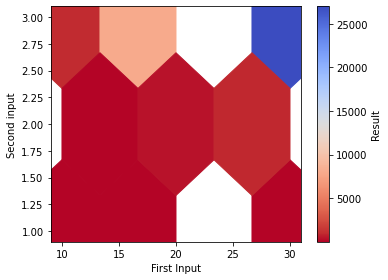

In [19]:
labels = {
    "x_1": "First Input",
    "x_2": "Second input"
}

sa = SensitivityAnalyzer(
    sensitivity_dict, my_model, grid_size=3, reverse_colors=True, color_map="coolwarm", labels=labels
)

plot = sa.plot()

In [20]:
styles = sa.styled_dfs()

,1,2,3
First Input,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


## Result by First Input vs. Second Input

This all works with more than two inputs as well. in that case we will get multiple pair-wise plots and styled ```DataFrame```'s:

In [25]:
def my_model_2(x_1, x_2, x_3):
    return x_1 * x_2 * x_3


sensitivity_dict = {
    "x_1": [10, 20, 30],
    "x_2": [1, 2, 3],
    "x_3": [7, 8, 9]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model_2, grid_size=3)

100%|██████████| 27/27 [00:00<00:00, 961.71it/s]


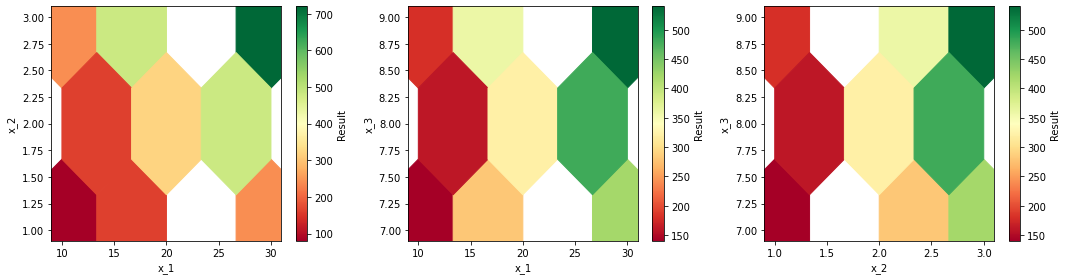

In [26]:
plot = sa.plot()

In [27]:
styled_dict = sa.styled_dfs()

,1,2,3
x_1,,,
10,80.000000,160.000000,240.000000
20,160.000000,320.000000,480.000000
30,240.000000,480.000000,720.000000


,7,8,9
x_1,,,
10,140.000000,160.000000,180.000000
20,280.000000,320.000000,360.000000
30,420.000000,480.000000,540.000000


,7,8,9
x_2,,,
1,140.000000,160.000000,180.000000
2,280.000000,320.000000,360.000000
3,420.000000,480.000000,540.000000


The plot is still a single ```Figure``` object, but the ```styled_dfs``` produces a dictionary where there are more than two inputs. The keys of the dictionary are a tuple of the column names involved in the ```Styler```, and the values are the ```Styler```s.

In [28]:
styled_dict

{('x_1', 'x_2'): <pandas.io.formats.style.Styler at 0x7fa38afec280>,
 ('x_1', 'x_3'): <pandas.io.formats.style.Styler at 0x7fa38b400130>,
 ('x_2', 'x_3'): <pandas.io.formats.style.Styler at 0x7fa38b345c10>}

### Adding Additional Styling to Styled ```DataFrames```

It could be desired to pass some number or other formatting to the styled ```DataFrame```s. This can be done with the ```num_fmt``` argument, either when first creating the ```SentitivityAnalyzer``` or when calling the ```styled_dfs``` method. just pass it the string of the numberformat, in the same way you would specify the number formatting string for ```df.style.format```.

In [29]:
styled_dict = sa.styled_dfs(num_fmt="${:,.0f}")

,1,2,3
x_1,,,
10,$80,$160,$240
20,$160,$320,$480
30,$240,$480,$720


,7,8,9
x_1,,,
10,$140,$160,$180
20,$280,$320,$360
30,$420,$480,$540


,7,8,9
x_2,,,
1,$140,$160,$180
2,$280,$320,$360
3,$420,$480,$540
